<a href="https://colab.research.google.com/github/Keerthashanthini/Vehicle_Routing_AIML/blob/main/vehicle_routing_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator,tools,algorithms

In [5]:
num_locations = 15
#randomly generate coordinates between 0 ans 100
locations = [(random.randint(0,100),random.randint(0,100))for _ in range(num_locations)]
#define the coordiates for the depot
depot = (50,50)
#display the number of vehicles
num_vehicles = 3
#display the data
print("Depot:",depot)
print("Locations:",locations)
print("Number of vehicles:",num_vehicles)

Depot: (50, 50)
Locations: [(87, 35), (70, 58), (3, 12), (83, 78), (2, 38), (85, 8), (78, 84), (14, 60), (47, 71), (72, 35), (95, 44), (100, 17), (44, 84), (43, 24), (50, 98)]
Number of vehicles: 3


In [6]:
#Genetic Algorithm Setup
# - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin",base.Fitness,weights=(-1,0,))
creator.create("Individual", list, Fitness=creator.FitnessMin)

In [8]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual",tools.initRepeat,creator.Individual,toolbox.indices)
toolbox.register("population",tools.initRepeat,list,toolbox.individual)

In [17]:
#TASK 5
import numpy as np
def evalVRP(individual):
    total_distance = 0
    distances = []
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        vehicle_distance = 0
        for k in range(len(vehicle_route) - 1):
            vehicle_distance += distance_matrix[vehicle_route[k]][vehicle_route[k + 1]]
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)
    return total_distance, balance_penalty
toolbox.register("evaluate", evalVRP)


In [21]:
# TODO: Task 7 - Configure the genetic operators

toolbox.register("mate", tools.cxUniform,indpb=0.5)
toolbox.register("mutate", tools.mutShuffleIndexes,indpb=0.2)
toolbox.register("select", tools.selTournament,tournsize=0.5)

<ipython-input-35-ac5e0742d17c>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", num_vehicles)


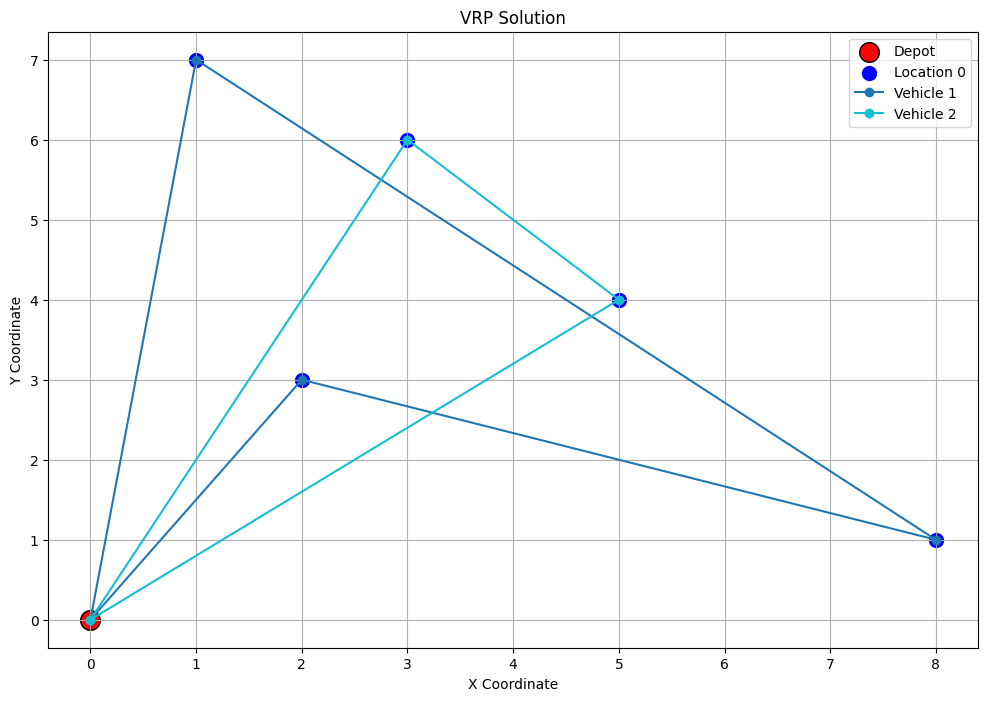

In [35]:
import matplotlib.pyplot as plt

def plot_vrp_solution(individual, locations, depot, num_vehicles, title="VRP Solution"):
    """
    Plots the routes for a VRP solution.

    Args:
        individual: List of indices representing the solution.
        locations: List of (x, y) coordinates for each location.
        depot: (x, y) coordinates of the depot.
        num_vehicles: Number of vehicles.
        title: Title of the plot.
    """
    plt.figure(figsize=(12, 8))

    # Plot depot as a red square
    plt.scatter(depot[0], depot[1], c='red', s=200, edgecolors='black', label='Depot')

    # Plot all locations as blue dots
    for idx, (x, y) in enumerate(locations):
        plt.scatter(x, y, c='blue', s=100, label=f'Location {idx}' if idx == 0 else "")

    # Assign a unique color for each vehicle route
    colors = plt.cm.get_cmap("tab10", num_vehicles)

    for vehicle in range(num_vehicles):
        # Get the route for the current vehicle
        route_indices = [individual[j] for j in range(vehicle, len(individual), num_vehicles)]
        route = [depot] + [locations[i] for i in route_indices] + [depot]

        # Unpack x and y coordinates
        x_coords, y_coords = zip(*route)

        # Plot the route
        plt.plot(x_coords, y_coords, marker='o', label=f'Vehicle {vehicle + 1}', color=colors(vehicle))

    # Customize the plot
    plt.title(title)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming `individual` is a solution from your genetic algorithm
# Generate a dummy individual for visualization
individual = random.sample(range(len(locations)), len(locations))  # Replace with your GA result

plot_vrp_solution(individual, locations, depot, num_vehicles, title="VRP Solution")


TypeError: initRepeat() missing 1 required positional argument: 'n'

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg   	min    
0  	300   	728.13	565.066
1  	223   	707.401	569.952
2  	231   	695.829	560.785
3  	239   	690.732	557.782
4  	228   	689.335	557.782
5  	235   	685.733	532.229
6  	231   	677.315	524.688
7  	211   	677.311	519.082
8  	227   	681.857	524.688
9  	229   	683.951	524.688
10 	218   	675.924	527.734
11 	220   	672.05 	494.553
12 	237   	669.241	511.403
13 	215   	649.665	498.458
14 	215   	645.504	511.403
15 	225   	633.69 	511.403
16 	217   	628.68 	511.403
17 	215   	621.072	506.589
18 	235   	616.811	498.458
19 	235   	618.79 	498.458
20 	219   	600.256	498.458
21 	231   	598.772	501.187
22 	225   	582.44 	498.458
23 	222   	574.478	498.458
24 	217   	570.34 	498.458
25 	213   	560.795	498.458
26 	227   	547.563	498.458
27 	225   	561.444	498.458
28 	236   	555.958	498.458
29 	236   	542.007	498.458
30 	232   	546.655	498.458
Best Individual: [2, 0, 1, 3, 6, 5, 8, 4, 7, 9]
Best Fitness: (494.5525283978325,)


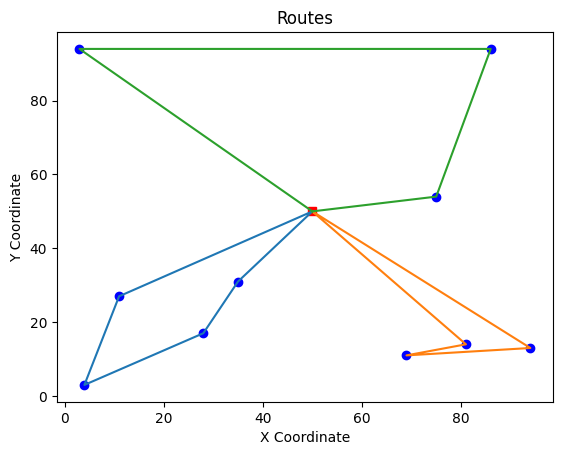

In [37]:
# Install necessary libraries at the beginning of the notebook
!pip install matplotlib deap

# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import random

# Task 2: Define the number of locations and vehicles
num_locations = 10
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50, 50)
num_vehicles = 3

# Task 3: Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Single objective (minimizing total distance)
creator.create("Individual", list, fitness=creator.FitnessMin)

# Task 4: Starting with the toolbox and tools
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function
def evalVRP(individual):
    total_distance = 0
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        vehicle_distance = sum(
            np.linalg.norm(np.array(vehicle_route[k + 1]) - np.array(vehicle_route[k]))
            for k in range(len(vehicle_route) - 1)
        )
        total_distance += vehicle_distance
    return total_distance,  # Return a tuple

toolbox.register("evaluate", evalVRP)

# Task 7: Configure the genetic operators
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.5)
toolbox.register("select", tools.selTournament, tournsize=3)

# Plot routes
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

# Running the Genetic Algorithm
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 30, stats=stats, halloffame=hof)
    return pop, stats, hof

if __name__ == "__main__":
    population, stats, hall_of_fame = main()
    best_individual = hall_of_fame[0]
    print("Best Individual:", best_individual)
    print("Best Fitness:", evalVRP(best_individual))
    plot_routes(best_individual)